# Project 1 Paris Trading
Wenkai Fu - 1005787347 \
Oct 9th 2023

## Data Section

In [116]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from pandas.tseries.offsets import BDay

In [117]:
#@title Load datasets to set assumptions
KO = yf.Ticker('KO')
PEP = yf.Ticker('PEP')

# Download past 5 years data for KO and PEP
KO_df = KO.history(period = '5y')
PEP_df = PEP.history(period = '5y')
df = KO_df[['Close']].merge(PEP_df[['Close']], on = 'Date', how = 'left')
df.rename(columns = {"Close_x": "KO", "Close_y": "PEP"}, inplace = True)
spread = df['PEP'] - df['KO']
KO = df['KO']
PEP = df['PEP']

print(f"To balance the trade:{KO[-1], PEP[-1], PEP[-1]/KO[-1]}")

# Calculate returns for KO and PEP
dKO = np.diff(KO)
dPEP = np.diff(PEP)
dspread = np.diff(spread)

df_returns = pd.DataFrame({'dKO': dKO,
                           'dPEP': dPEP,
                           'dspread': dspread,
                           'Date': df.index[1:]}).dropna()
df_returns = df_returns.set_index('Date')
print(f"The stock price dataset \n{df}")
print(f"The stock returns dataset \n{df_returns}")
print(f"The mean return of KO is: {df_returns['dKO'].mean()}")
print(f"The volatility of KO is: {df_returns['dKO'].std()}")
print(f"The mean return of PEP is: {df_returns['dPEP'].mean()}")
print(f"The volatility of PEP is: {df_returns['dPEP'].std()}")

To balance the trade:(54.029998779296875, 164.39999389648438, 3.042753981321186)
The stock price dataset 
                                  KO         PEP
Date                                            
2018-10-11 00:00:00-04:00  38.190426   91.172333
2018-10-12 00:00:00-04:00  38.224640   91.363266
2018-10-15 00:00:00-04:00  38.421413   91.667007
2018-10-16 00:00:00-04:00  38.917610   93.194359
2018-10-17 00:00:00-04:00  39.234146   93.992737
...                              ...         ...
2023-10-04 00:00:00-04:00  55.040001  168.910004
2023-10-05 00:00:00-04:00  52.380001  160.100006
2023-10-06 00:00:00-04:00  53.139999  160.289993
2023-10-09 00:00:00-04:00  52.880001  161.360001
2023-10-10 00:00:00-04:00  54.029999  164.399994

[1257 rows x 2 columns]
The stock returns dataset 
                                dKO      dPEP   dspread
Date                                                   
2018-10-12 00:00:00-04:00  0.034214  0.190933  0.156719
2018-10-15 00:00:00-04:00  0.196774  

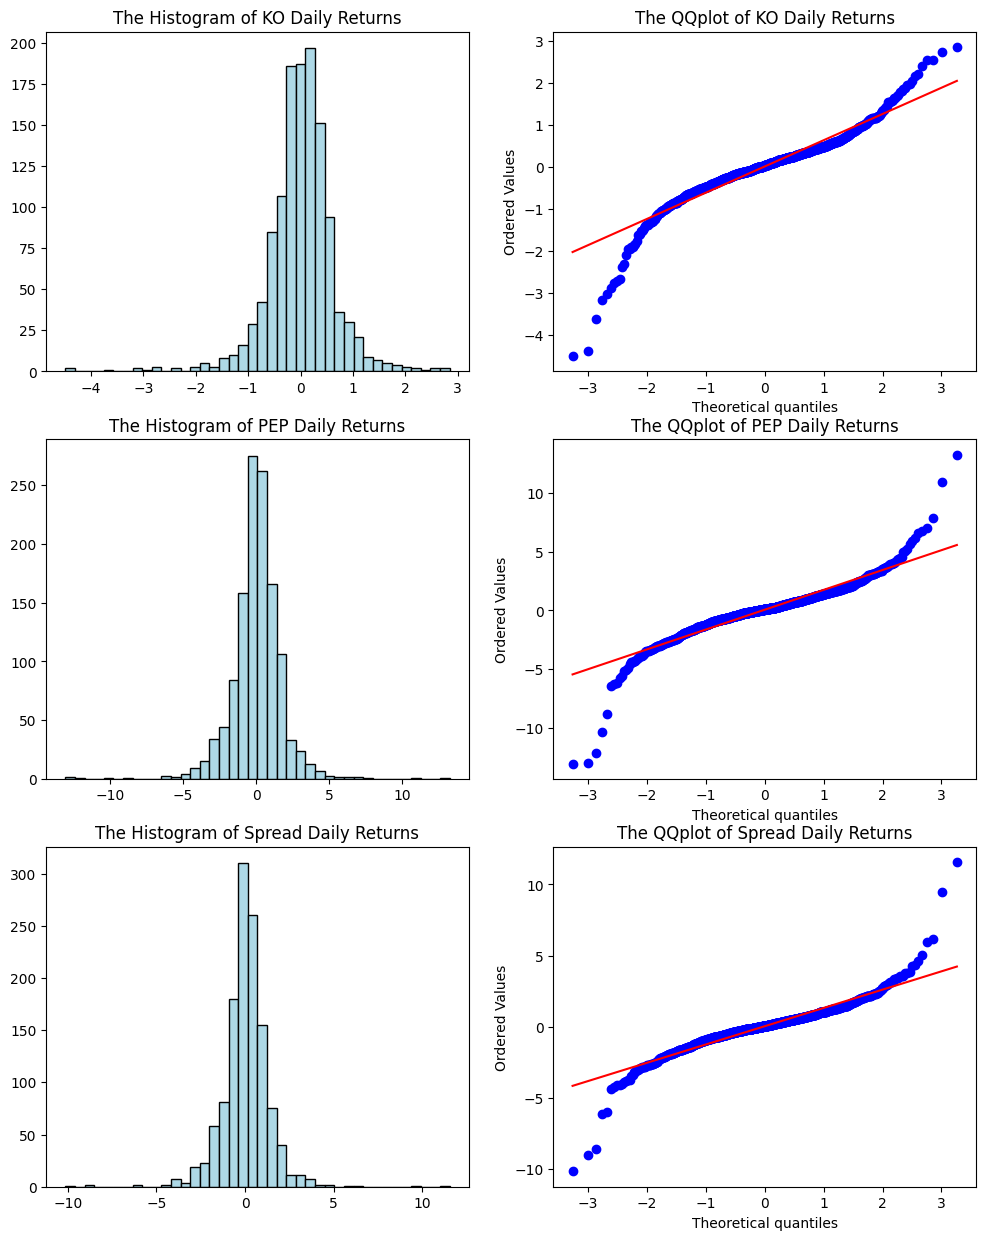

In [118]:
#@title Data Visualization and Assumption Checking
plt.figure(figsize = (12,15))

plt.subplot(3,2,1)
plt.hist(dKO, bins = 40, color = 'lightblue',edgecolor = 'black')
plt.title("The Histogram of KO Daily Returns")

plt.subplot(3,2,2)
stats.probplot(dKO, dist = stats.norm, plot = plt)
plt.title("The QQplot of KO Daily Returns")

plt.subplot(3, 2, 3)
plt.hist(dPEP, bins = 40, color = 'lightblue',edgecolor = 'black')
plt.title("The Histogram of PEP Daily Returns")

plt.subplot(3, 2, 4)
stats.probplot(dPEP, dist = stats.norm, plot = plt)
plt.title("The QQplot of PEP Daily Returns")

plt.subplot(3, 2, 5)
plt.hist(dspread, bins = 40, color = 'lightblue',edgecolor = 'black')
plt.title("The Histogram of Spread Daily Returns")

plt.subplot(3, 2, 6)
stats.probplot(dspread, dist = stats.norm, plot = plt)
plt.title("The QQplot of Spread Daily Returns")



plt.show()

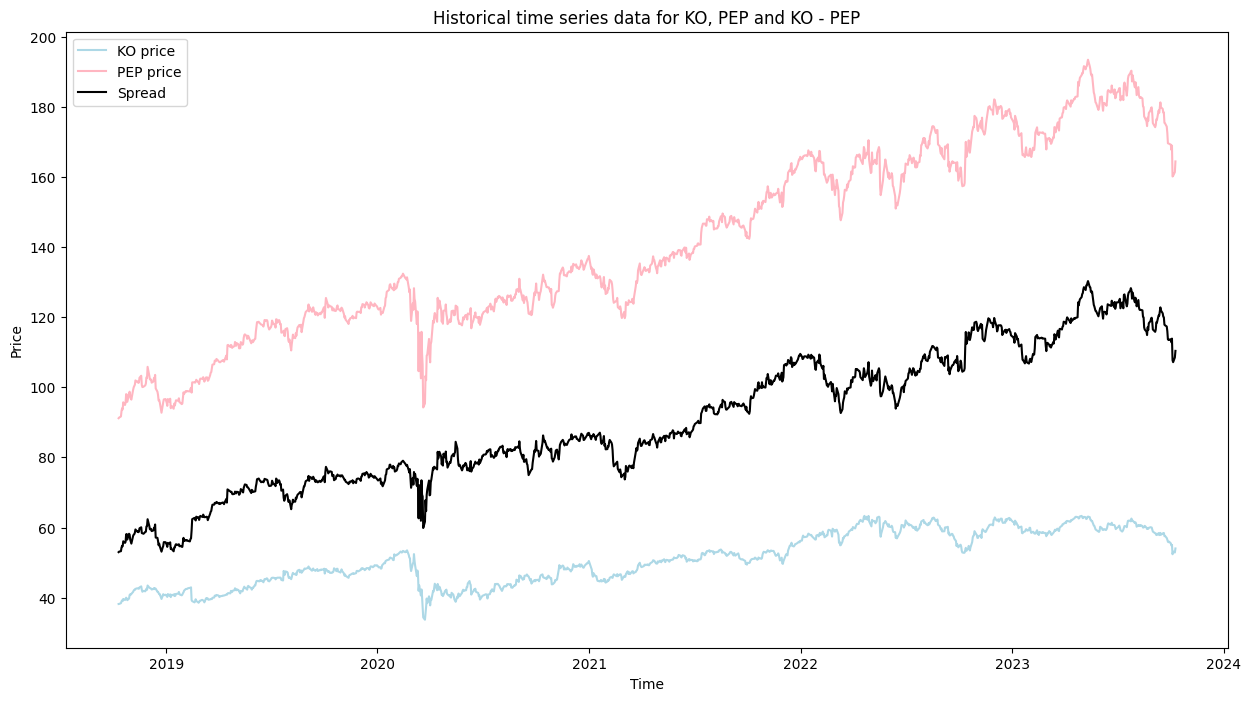

In [119]:
plt.figure(figsize = (15,8))
plt.plot(df.index, df['KO'], color = 'lightblue', label = "KO price")
plt.plot(df.index, df['PEP'], color = 'lightpink', label = "PEP price")
plt.plot(df.index, spread, color = 'black', label = "Spread")
plt.legend()
plt.title('Historical time series data for KO, PEP and KO - PEP')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

## Simulations

In [120]:
#@title Simulation of daily time seires for coke and pepsi
# Assumption for Coke
mu_c = dKO.mean() # Oct 9th Y
sigma_c = dKO.std() # Oct 9th ~
S0_c = KO[-1] # Oct 9th ~

# Assumption for Pepsi
mu_p = dPEP.mean() # Oct 9th Y
sigma_p = dPEP.std() # Oct 9th ~
S0_p = PEP[-1] # Oct 9th ~

# Daily series settings
T = 1
NTrials = 100000
Nsteps = 60
t = np.linspace(0, T, Nsteps)
dt = T/Nsteps


In [121]:
#@title Model spread - Cholesky Decomposition Processes
# seed_value = 70
# np.random.seed(seed_value)
w1 = np.random.normal(0,1,size = (Nsteps, NTrials))
w2 = np.random.normal(0,1,size = (Nsteps, NTrials))
C = np.corrcoef([dPEP,dKO])
print(f"The Correlation Coefficient is:\n{C}")
L = np.linalg.cholesky(C).T
print(f"The Cholesky Decomposition is:\n{L}")
z1 = np.zeros((Nsteps, NTrials))
z2 = np.zeros((Nsteps, NTrials))

for i in range(1, NTrials):
  zTemp = np.dot(np.column_stack((w1[:,i], w2[:,i])), L)
  # Store results
  z1[:,i] = zTemp[:,0]
  z2[:,i] = zTemp[:,1]

print(f"The Correlation coefficient for \n Wiener processes is: \n{np.corrcoef(z1[:,1], z2[:,1])}")

The Correlation Coefficient is:
[[1.         0.76928667]
 [0.76928667 1.        ]]
The Cholesky Decomposition is:
[[1.         0.76928667]
 [0.         0.63890376]]
The Correlation coefficient for 
 Wiener processes is: 
[[1.        0.7788251]
 [0.7788251 1.       ]]


In [122]:
#@title Model KO, PEP and spread(PEP-KO)
# Model KO
KO_pred = S0_c + np.cumsum(mu_c * np.ones((Nsteps, NTrials)) +
                           sigma_c * z1, axis = 0)
# Model PEP
PEP_pred = S0_p + np.cumsum(mu_p * np.ones((Nsteps, NTrials)) +
                           sigma_p * z2, axis = 0)
# spread(PEP-KO)
spread_pred = PEP_pred - KO_pred
end_date = df_returns.index[-1] + 60*BDay()
t_pred = pd.date_range(start = df_returns.index[-1],
                       end = end_date,
                       freq = 'B')

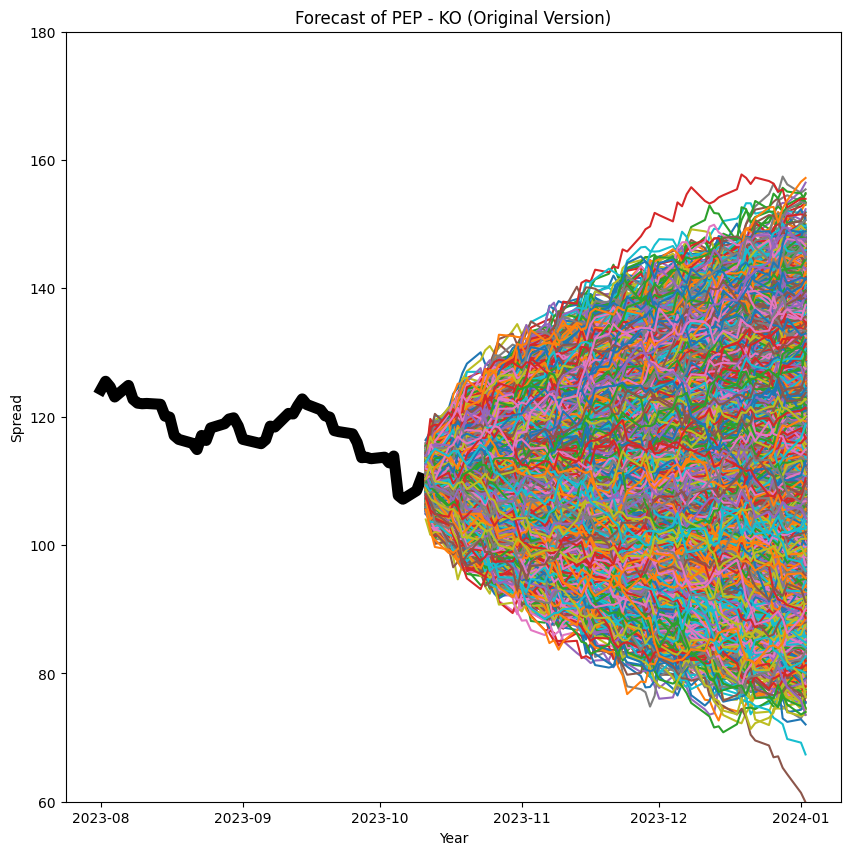

In [123]:
#@title Visualization - spread
plt.figure(figsize=(10,10))
plt.plot(df.index[-50:], spread[-50:],
         color = 'black', linewidth = 8)
plt.plot(t_pred[1:], spread_pred)
plt.xlabel('Year')
plt.ylabel('Spread')
plt.title('Forecast of PEP - KO (Original Version)')
plt.ylim(60, 180)
plt.show()

In [124]:
#@title Detrending Process for the Spread
sTrend = spread[-1] + np.mean(dspread) * np.linspace(0, Nsteps, Nsteps)
spreadDetrend = spread_pred - np.tile(sTrend, (NTrials,1)).T
dSpreadDetrend = np.diff(spreadDetrend)

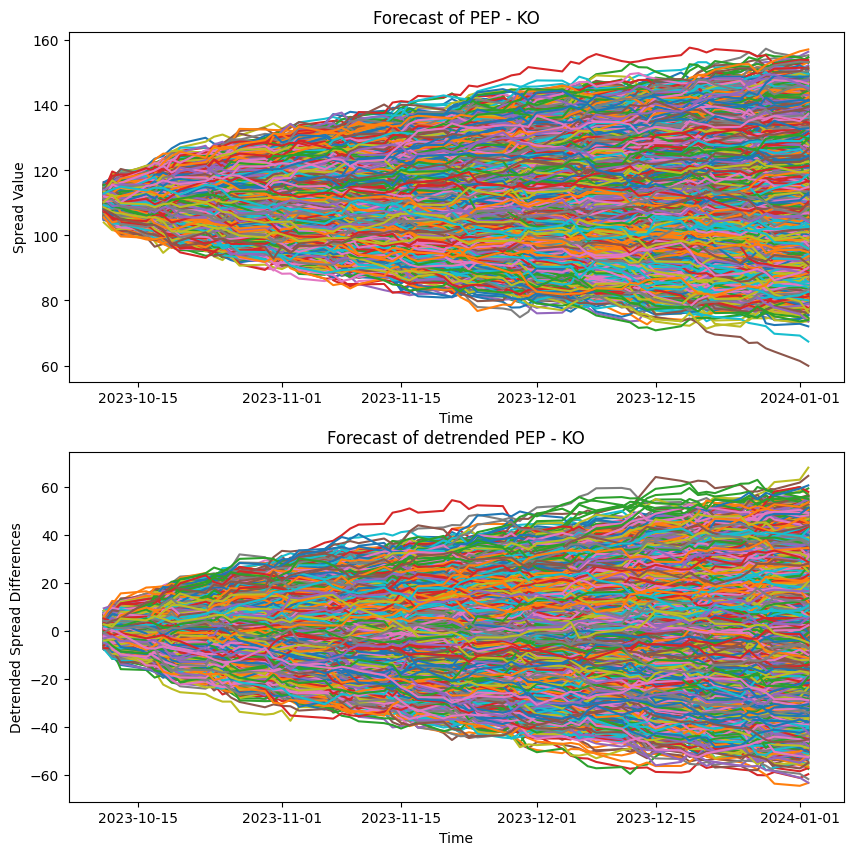

In [125]:
#@title Visualization for detrending
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.plot(t_pred[1:], spread_pred) # Predicted spread
plt.xlabel('Time')
plt.ylabel('Spread Value')
plt.title('Forecast of PEP - KO')

plt.subplot(2,1,2)
plt.plot(t_pred[1:], dSpreadDetrend) # Detrended spread
plt.xlabel('Time')
plt.ylabel('Detrended Spread Differences')
plt.title('Forecast of detrended PEP - KO')

# plt.ylim(60, 180)

plt.show()

In [126]:
#@title The OU process to perform the mean reversion
# dX = a * (b-X) * dt + sigma * dw
mu = np.mean(dSpreadDetrend)
sigma = np.std(dSpreadDetrend)

Z = np.random.normal(0,1,(Nsteps, NTrials))
X0 = spreadDetrend[0]

XOU = np.zeros((Nsteps, NTrials))
XOU[0,:] = X0

a = 0.1 #% Need to find the optimal
for i in range(1, Nsteps):
  XOU[i, :] = XOU[i-1, :] + mu - a * XOU[i-1,:] + sigma * Z[i,:]

XOUTREND = XOU + np.tile(sTrend, (NTrials,1)).T

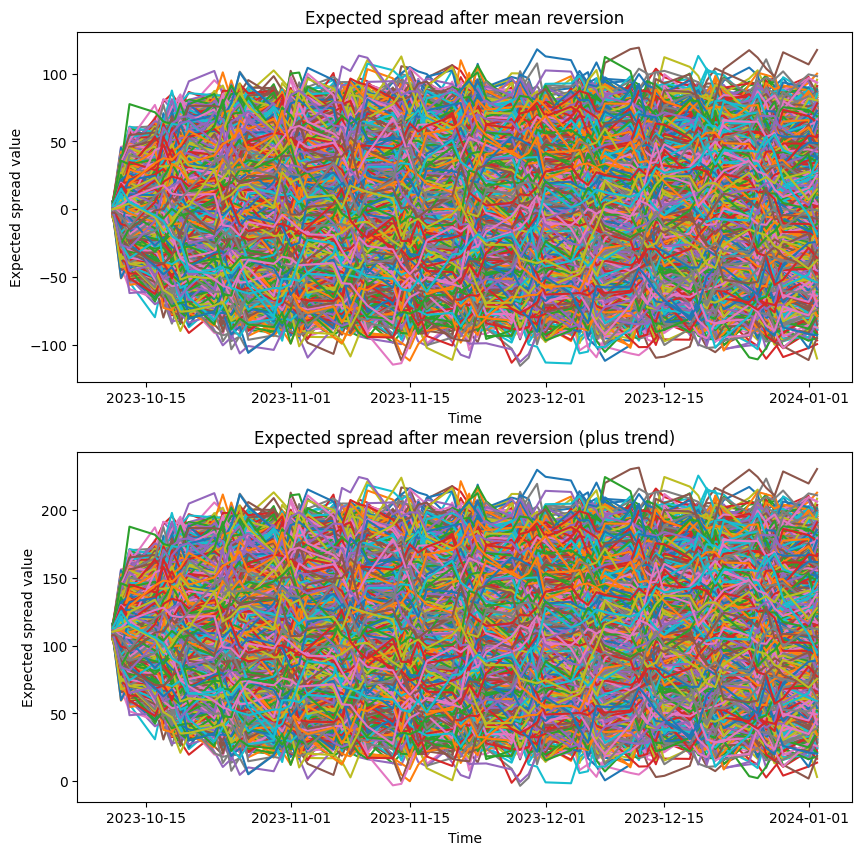

In [127]:
#@title Visualization for mean reversion(OU)
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.plot(t_pred[1:], XOU)
plt.xlabel('Time')
plt.ylabel('Expected spread value')
plt.title('Expected spread after mean reversion')


plt.subplot(2,1,2)
plt.plot(t_pred[1:], XOUTREND)
plt.xlabel('Time')
plt.ylabel('Expected spread value')
plt.title('Expected spread after mean reversion (plus trend)')


plt.show()

## Pairs Trade Calculation

In [128]:
cash = 100000
shares_ko = cash/KO[-1]
shares_pep = cash/PEP[-1]
print(shares_ko)
print(shares_pep)
print(f"1 PEP = {shares_ko/shares_pep} KO")

1850.8236583251198
608.2725286654555
1 PEP = 3.0427539813211855 KO


In [129]:
#@title The expected value of the trade on Oct 16th
mean_KO_16th = np.mean(KO_pred[4,:])
mean_PEP_16th = np.mean(PEP_pred[4,:])
print(f"The mean value of forecasted KO price on 16th is: {mean_KO_16th}")
print(f"The mean value of forecasted PEP price on 16th is: {mean_PEP_16th}")
expected_value = shares_pep * mean_PEP_16th - shares_ko * mean_KO_16th
print(f"The expected value of the trade is: {expected_value}")

The mean value of forecasted KO price on 16th is: 54.092614892465335
The mean value of forecasted PEP price on 16th is: 164.6860259926926
The expected value of the trade is: 58.09408279552008


The 5th and 95th percentile is: [-2840.7551319841714, 2969.4878883951837]


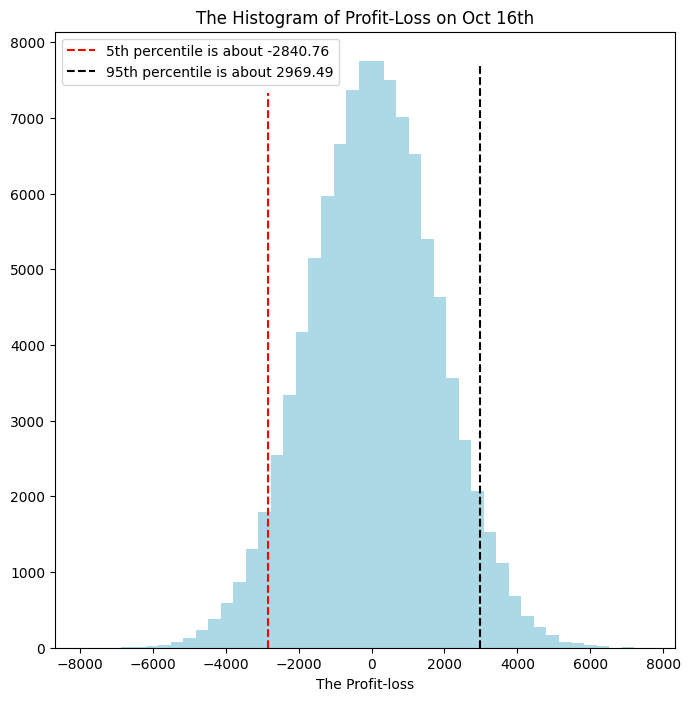

In [130]:
#@title The 5th and 95th percentile of profit-loss
value_16th = shares_pep * PEP_pred[4,:] - shares_ko * KO_pred[4,:]
percentile_5th = np.percentile(value_16th, 5)
percentile_95th = np.percentile(value_16th, 95)
print(f"The 5th and 95th percentile is: [{percentile_5th}, {percentile_95th}]")

plt.figure(figsize = (8,8))
plt.hist(value_16th, bins = 45, color = 'lightblue')
plt.axvline(x = percentile_5th, color = 'red',  linestyle='--',
            label = f'5th percentile is about {percentile_5th:.2f}',ymin = 0, ymax = 0.9)
plt.axvline(x = percentile_95th, color = 'black',  linestyle='--',
            label = f'95th percentile is about {percentile_95th:.2f}',ymin = 0, ymax = 0.95)
plt.xlabel('The Profit-loss')
plt.title("The Histogram of Profit-Loss on Oct 16th")
plt.legend()
plt.show()

In [132]:
#@title At what price should you enter the pairs trade
# the cash rate is 5%
cash_y = 0.05
cash_w = cash_y/52
interest = cash * cash_w
def inverse_percentile(number: float, array):
  '''
  Inverse np.percentile function, given an array and
  a number in the array, return the percentile of that
  number in the array.
  '''
  values_below_number = np.sum(array < interest)
  return values_below_number / len(array)

higher_bound = inverse_percentile(interest, value_16th)
lower_bound = 0.5 - (inverse_percentile(interest, value_16th) - 0.5)
print(f"The price differential should be between {higher_bound} and {lower_bound} of the simulations")

The price differential should be between 0.50857 and 0.49143000000000003 of the simulations


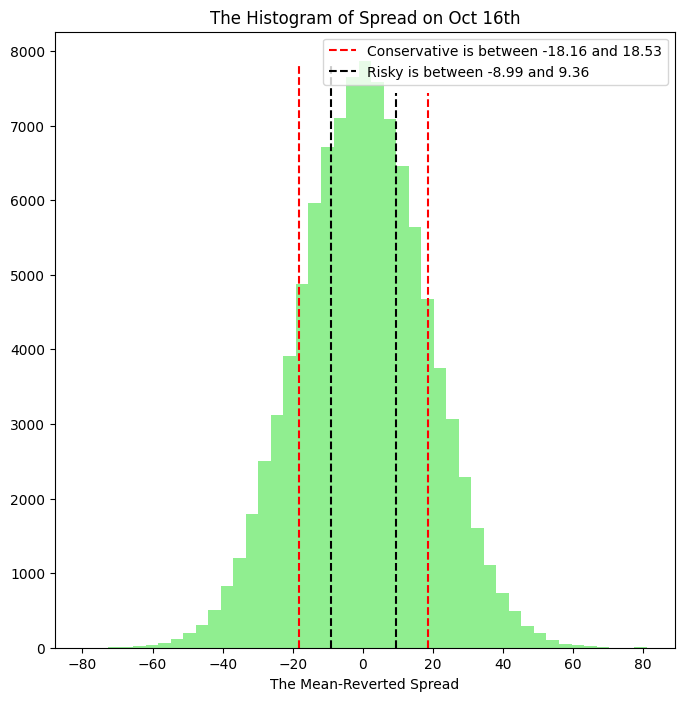

0.18467523152139842
18.346720211323852


In [135]:
#@title At what price should you enter the pairs trade(Conservative vs risky)
# define two investors
cons_investor = 1 # standard deviation
risky_investor = 0.5 # standard deviation

spread_16th = XOU[4,:]
mean_spread_16th = np.mean(spread_16th)
spread_16th_std = np.std(spread_16th)

cons_threshold = spread_16th_std * cons_investor
risky_threshold = spread_16th_std * risky_investor

plt.figure(figsize = (8,8))
plt.hist(spread_16th, bins = 45, color = 'lightgreen')
plt.axvline(x = mean_spread_16th + cons_threshold, color = 'red',  linestyle='--',
            ymin = 0, ymax = 0.9)
plt.axvline(x = mean_spread_16th - cons_threshold, color = 'red',  linestyle='--',
            label = f'Conservative is between {mean_spread_16th - cons_threshold:.2f} and {mean_spread_16th + cons_threshold:.2f}',
            ymin = 0, ymax = 0.95)
plt.axvline(x = mean_spread_16th + risky_threshold, color = 'black',  linestyle='--',
            ymin = 0, ymax = 0.9)
plt.axvline(x = mean_spread_16th - risky_threshold, color = 'black',  linestyle='--',
            label = f'Risky is between {mean_spread_16th - risky_threshold:.2f} and {mean_spread_16th + risky_threshold:.2f}',
            ymin = 0, ymax = 0.95)
plt.xlabel('The Mean-Reverted Spread')
plt.title("The Histogram of Spread on Oct 16th")
plt.legend()
plt.show()

print(mean_spread_16th)
print(spread_16th_std)